In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')  # change pyplots default style
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [2]:
# mpl.use("pgf")  # to display graphs remove this line
mpl.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
line = 0.75

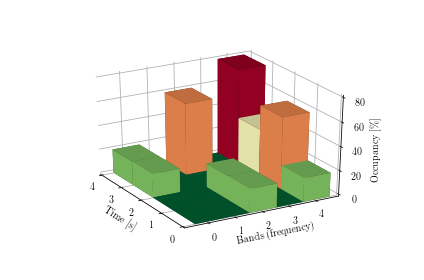

In [6]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca(projection='3d')

_x = np.arange(4) - 0.1
_y = np.arange(5) - 0.5
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = [ .1, .1, 20, 20, 
        .1, .1, .1, .1, 
        20, 20, .1, 60,  
        .1, .1, .1, .1,  
        20, 60, 40, 80]

bottom = np.zeros_like(top)
width = depth = 1

import matplotlib.colors as colors
import matplotlib.cm as cm

offset = top + np.abs(min(top))
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
# color_values = cm.ocean(norm(fracs.tolist()))
# color_values = cm.prism_r(norm(fracs.tolist()))
# color_values = cm.brg_r(norm(fracs.tolist()))
color_values = cm.RdYlGn_r(norm(fracs.tolist()))


ax.bar3d(x, y, bottom, width, depth, top, color=color_values, zsort='average', shade=True)

ax.view_init(elev=30, azim=-30)

ax.zaxis.set_rotate_label(False)
ax.set_xlabel(r'Time [s]')
ax.invert_xaxis()
# ax.set_ylabel(r'Bands')
ax.set_ylabel(r'Bands (frequency)')
ax.set_zlabel(r'Occupancy [\%]', rotation=90)

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_zticks([0, 20, 40, 60, 80])

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.dist = 13

plt.tight_layout()
plt.savefig('out/spec_util.pgf')